In [68]:
import sys
import os
import glob
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm

from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
INPUT_FOLDER = '../ryan_audio/les_mis/'
OUTPUT_NAME = 'lupincontresholme.mp3'

In [70]:
# Get all audio files into single array
for i,f in enumerate(glob.glob(INPUT_FOLDER+'*')):
    temp, sr = librosa.load(f,sr=None)
    if i == 0:
        final = temp
    else:
        final = np.concatenate((final,temp))

In [71]:
# Save array
librosa.output.write_wav(OUTPUT_NAME,final,sr)

Open Audacity and split

In [72]:
LANGUAGE_CODE = 'fr'
BOOK_TITLE = 'lesmis'
LABELS_NAME = 'lesmis_labels.txt'

In [73]:
# Make language directory
os.system('mkdir '+LANGUAGE_CODE)

256

In [74]:
# Make book directory
os.system('mkdir '+LANGUAGE_CODE+'/'+BOOK_TITLE)

256

In [75]:
# Read silences
silences = np.array(pd.read_csv(LABELS_NAME,delimiter='\t',header=None).iloc[:,0])

In [76]:
sr

22050

In [77]:
ref_len = 10. # We controls the length of each clip such that it is close to this.
min_len = 1.  # We ignore a split point if it causes an audio clip under 5 1 sec.

cursor, _nsamples, filtered = 0, 0, []
for s in silences:
    nsamples = s - cursor
    if nsamples > ref_len and _nsamples > min_len:
        cursor = _s
        filtered.append(cursor)
        nsamples = s - cursor

    _nsamples, _s = nsamples, s

# Split data and write
for i,s in tqdm(enumerate(filtered)):
    if i == 0:
        prev_cursor = 0
    curr_cursor = int(sr*s)
    clip = final[prev_cursor:curr_cursor]
    output_num = str(i).zfill(4)
    librosa.output.write_wav(LANGUAGE_CODE+'/'+BOOK_TITLE+'/'+BOOK_TITLE+output_num+'.wav',clip,sr)
    prev_cursor = curr_cursor

5601it [00:16, 340.37it/s]


In [78]:
assert set(filtered) < set(silences)

In [79]:
# Get statistics
durations_k = []
for i,s in tqdm(enumerate(filtered)):
    if i == 0:
        prev_cursor = 0
    curr_cursor = s
    durations_k.append(curr_cursor-prev_cursor)
    prev_cursor = curr_cursor

5601it [00:00, 829764.65it/s]


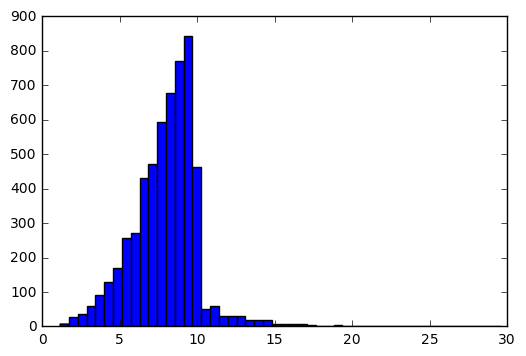

In [80]:
plt.hist(durations_k,bins=50)
plt.show()

In [81]:
durations_k=np.array(durations_k)
print('percent clips > 15 sec: ',len(durations_k[durations_k>15])/float(len(durations_k)))

('percent clips > 15 sec: ', 0.00767720049991073)


In [82]:
print('percent clips > 10 sec: ',len(durations_k[durations_k>10])/float(len(durations_k)))

('percent clips > 10 sec: ', 0.06034636672022853)


In [83]:
print('total audio: ',durations_k.sum()/3600)

('total audio: ', 12.424318310555556)


In [84]:
print('audio greater than 10 sec: ',durations_k[durations_k>10].sum()/3600)

('audio greater than 10 sec: ', 1.1917304108333309)


In [85]:
print('audio greater than 15 sec: ',durations_k[durations_k>15].sum()/3600)

('audio greater than 15 sec: ', 0.22013580250000075)
